In [1]:
import tensorflow as tf
import os
import numpy as np

In [2]:
dataset = r"G:/breast_cancer"

In [3]:
IMAGE_SIZE = 224
BATCH_SIZE = 32

train_data = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split = 0.2
)

validation_data = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2
)

In [4]:
train_gen = train_data.flow_from_directory(
    dataset,
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    subset='training'
) 

validation_gen = validation_data.flow_from_directory(
    dataset,
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation'
)

Found 6342 images belonging to 2 classes.
Found 1584 images belonging to 2 classes.


In [5]:
from tensorflow.keras.layers import Input,Flatten,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from glob import glob

In [6]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [7]:
img_width, img_height = 224, 224
inception = InceptionV3(
    weights = 'imagenet',
    include_top = False,
    input_shape = (img_width, img_height, 3)
)

In [8]:
for layer in inception.layers:
    layer.trainable = False

In [9]:
x = Flatten()(inception.output)
prediction = Dense(2, activation = 'softmax')(x)
model=Model(inputs = inception.input, outputs = prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [10]:
model.compile(
    loss='binary_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

In [11]:
epoch = 20

history = model.fit(train_gen,
                    steps_per_epoch = len(train_gen),
                    epochs = epoch,
                    validation_data=validation_gen,
                    validation_steps=len(validation_gen)
                   )

Epoch 1/20
199/199 [==============================] - 399s 2s/step - loss: 0.8581 - accuracy: 0.7763 - val_loss: 1.4932 - val_accuracy: 0.7039
Epoch 2/20
199/199 [==============================] - 294s 1s/step - loss: 0.6865 - accuracy: 0.8198 - val_loss: 2.1616 - val_accuracy: 0.6957
Epoch 3/20
199/199 [==============================] - 282s 1s/step - loss: 0.6752 - accuracy: 0.8346 - val_loss: 2.0596 - val_accuracy: 0.6155
Epoch 4/20
199/199 [==============================] - 279s 1s/step - loss: 0.8315 - accuracy: 0.8291 - val_loss: 2.1339 - val_accuracy: 0.7058
Epoch 5/20
199/199 [==============================] - 279s 1s/step - loss: 0.7100 - accuracy: 0.8437 - val_loss: 2.7969 - val_accuracy: 0.7247
Epoch 6/20
199/199 [==============================] - 277s 1s/step - loss: 0.6994 - accuracy: 0.8518 - val_loss: 2.5120 - val_accuracy: 0.7159
Epoch 7/20
199/199 [==============================] - 275s 1s/step - loss: 0.6217 - accuracy: 0.8571 - val_loss: 2.2633 - val_accuracy: 0.6111

In [12]:
score = model.evaluate(validation_gen)

50/50 [==============================] - 50s 988ms/step - loss: 2.4611 - accuracy: 0.7014


In [13]:
score

[2.4610788822174072, 0.7013888955116272]

In [14]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 199}

In [15]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [17]:
import matplotlib.pyplot as plt

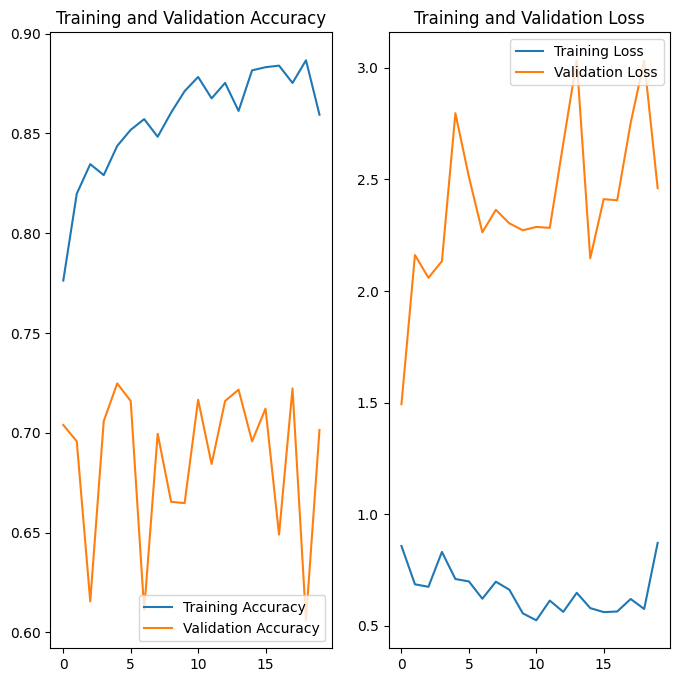

In [18]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(epoch), acc, label='Training Accuracy')
plt.plot(range(epoch), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(epoch), loss, label='Training Loss')
plt.plot(range(epoch), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [19]:
model_version = "bc_hp_IV3"
model.save(f"models/{model_version}")

INFO:tensorflow:Assets written to: models/bc_hp_IV3\assets
